# Build it from Scratch Series

## 2. Artifical Neural  Networks

In this article, we will attempt to understand how the (perhaps rightly) glorified artificial neural networks work. There is a lot of material out there that describe and implement a neural network in a mathematically and functionally rigourous fashion, but this isn't the focus of our article. Our attempt is to formulate a layman's understanding of what happens inside a neural network and describe how it works. We will focus on gradually building up each component of the neural network in a naive and simplistic fashion, to keep the basics as clear as possible.

This article assumes that you are familiar with the basic concepts of machine learning and have heard of neural networks before- we will not go into the oft-repeated history and inspiration behind neural networks. We also assume you know a bit of elementary statistics and matrix algebra.

We will be using Scipy (python 3) to code up the neural network, and will only use the base numpy and scipy libraries for creating a neural network from scratch. We use these libraries to abstract out the details of basic operations like matrix multiplications & array handling, along with matplotlib for plotting graphs.

### First, The Neuron

Obviously, the name 'neural network' suggests that it is some sort of a network of neural things; and yes, these things are called neurons.

We can start off by defining what a single neuron is. A neuron can be thought of as an object that holds a number. The magnitude of the number suggests how active or excited the neuron is, much like the volume level of a stereo. Higher the value of this number, more active the neuron is, and vice versa. 

And just like there is a knob on the stereo that controls the volume, the neuron also has an input port which can be used to control how active the neuron becomes. For any input signal supplied through this input port, a mathematical function converts this input into the activation level of the neuron. This function is rather unimaginatively called the *activation function* of the neuron. The activation or excitation level can be considered as the output from the neuron.

### Activation function
For now, let us assume that activation of a neuron is bounded within the range $[0, 1]$ for any given input signal. We can think of 0 as the state of the neuron being completely inactive, and 1 as the state of neuron being fully active. So, for any numeric input supplied to the neuron in the interval $[-\infty, \infty]$, we need to design an activation function that takes this input number and squishes it into a number between 0 and 1. 

How do we go about designing such an activation function? For now, the only requirement we have is that for any input, the function squishes the input into a number between 0 and 1. For those who know a bit of statistics, there is a very familiar function that maps an arbitrary numeric input into \[0, 1\] interval - the **logit** function which is commonly used in logistic regression. The logit function is given by


\begin{align}
f(x) = \frac{1}{1 + e^{-k(x - x_0)} }\notag
\end{align}

For keeping things simple, we use k=1, and x<sub>0</sub> = 0 as default for now, which makes the equation

\begin{align}
f(x) = \frac{1}{1 + e^{-x} } = \sigma(x)\notag
\end{align}

We call this special case of the logit function as the **sigmoid**, and use a $\sigma$ to represent it. Let us write some code to implement this function.

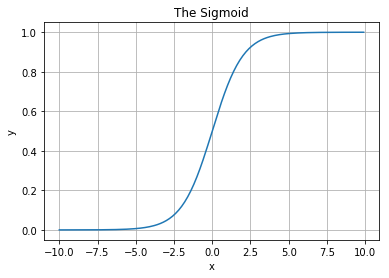

In [147]:
# Import all required libraries
import numpy as np
import matplotlib as mtl
import pandas as pd
from matplotlib import pyplot
from IPython.display import display, HTML, Markdown # For printing nice looking tables from pandas dataframes

# For printing dataframe tables side by side
CSS = """
div.cell:nth-child(10) .output {
    flex-direction: row;
}
"""
HTML('<style>{}</style>'.format(CSS))


# Create the activation function for the neuron
def sigmoid(x):
    return 1./(1. + np.exp(-1.* x) )


# Plot the sigmoid function
pyplot.plot(np.arange(-10, 10, 0.1), sigmoid(np.arange(-10, 10, 0.1)))
pyplot.grid(True)
pyplot.title('The Sigmoid')
pyplot.xlabel('x')
pyplot.ylabel('y')
pyplot.show()

### The Neural Network

A neural network, as the name suggests, is a set of interconnected neurons. In biological neural networks, individual neuron cells are connected to each other through connections called synapses. Each synapse has a weight associated with it; this weight determines how strongly bound two neurons are. A signal passed from one neuron to the next through this synapse is amplified (or attenuated) proportional to the strength of this synaptic connection.

Just as in the biological counterpart, the artificial neural network we are constructing here can be be thought of as a bunch of artificial neurons that are connected to each other, with each link having an associated strength. When the output from one neuron passes to the subsequent neuron, it gets scaled by the strength of the link that connects the two neurons. This strength is called the **weight** of the link, and the weight is also a numerical quantity, just like neuron activation level.

As an example, consider the simplest possible neural network with 2 neurons connected to each other through a link. Let the weight of the link be $w$. For an input $x$ to neuron A, the activation function $\sigma_A$ squishes $x$ into an number between 0 and 1, and this  is then passed to the synaptic link. The number is then scaled by the weight $w$ of the link, and becomes the input to neuron B. Now the activation function $\sigma_B$ of neuron B picks this value up and squishes it to \[0, 1\], which is the output of neuron B.

Hence the final output $y$ is given by  $ y = \sigma_B( \sigma_A(x) * w) ) $.



In [148]:
# Create a 2 neuron network, with 'x' as input and 'w' as weight of the link between the 2 neurons
def simplest_neural_network(x, w):
    return sigmoid(sigmoid(x)*w)

print("Large input: x=20 gives ", simplest_neural_network(x = 20, w = 4)) 
print("Small input: x=-20 gives ", simplest_neural_network(x = -20, w = 4)) 


Large input: x=20 gives  0.982013789892
Small input: x=-20 gives  0.500000002061


<br />
Before we consider more complex neural network structures, contemplate the following problem- let's say we are supplied a set of $n$ numbers, and are asked to design a function that takes these $n$ numbers as input and produces a given output $y$. In mathematical terms, we are asked to guess function $F$ in the following equation-

\begin{align}
y = F(x_1, x_2, ..., x_n)
\end{align}

To make the function a bit easier to guess, let's say we are given several such input-output pairs that the function should produce. Suppose that we are given $m$ such pairs of inputs and outputs- in that case, we can rewrite the equation in matrix terms -

\begin{align}
\begin{bmatrix}
y_{11} \\
y_{21} \\
: \\
y_{m1} \\
\end{bmatrix}
= F(
\begin{bmatrix}
x_{11} & x_{12} & ... & x_{1n} \\
x_{21} & x_{22} & ... & x_{2n} \\
: & : & : & : \\
x_{m1} & x_{m2} & ... & x_{mn} \\
\end{bmatrix} 
)
\end{align}

which can be rewritten as

\begin{align}
Y = F(X)
\end{align}


$F$ is a function that acts on each row of the input matrix $X$ and produces each element of the output $Y$ vector. And how on earth would we go about guessing the parameters of this function? 

If you're familiar with statistics, then you'd know that there are plenty of parameter estimation techniques that you can choose from, like linear least squares estimators or maximum likelihood functions. And if you're a machine learning enthusiast, you'd probably pick techniques like SVMs or decision trees or neural networks. Both groups of techniques share the same mathematical foundations of optimisation, albeit with different assumptions. And each technique comes with its own assumptions and pros and cons. The point of saying all this is that the neural network is just such a technique that solves the problem that we defined here. So, let us try to design a neural network structure that solves the function estimation problem.

To start with, we can imagine an easily comprehensible structure for the neural network (as opposed to imagining it as a messy interconnection of neurons like structure of our own brains). We are going to put 3 layers of neurons in our network-

1. an input layer of neurons (this is where we feed in our data inputs), 
2. a middle layer of neurons which are connected to the input layer through a set of weighted links (we call this the hidden layer), 
3. an output layer of neurons which are connected to the middle layer through another set of weighted links.

Obviously the input layer will have $n$ neurons, so as to accept the $n$ separate columns (or variables) in our input dataset as defined in the problem. In the hidden layer, we do not have any reasoning at this moment to choose the number of neurons, so we'll choose an arbitrary value. We will think of better ways to choose this more wisely at a later stage. The output layer has one neuron for now, since we have only one column of output in the problem definition above. However, note that there is no reason why the output has to be unidimensional; in fact we can have neural networks with multiple outputs, in which case the original problem becomes finding a function that relates input-output vector pairs.

Why did we choose a network with three layers? Because obviously with just one layer of neurons there is no network that can be formed (we do not connect neurons within the same layer). And with two layers, what we get is a very simplistic network that can only guess functions which are a linear combination of the input data. This is because there is only one layer of weights between input and output layer, and all possible functions involve multiplying the input data matrix with a vector of weights. While there is nothing wrong with such a neural network, we are severly limited in the functions to choose from. Such neural networks fail to capture any non-linear relationships that may exist between the input and output. As a result, we stick with 3 layers of neurons in our neural network.

For our neural network, we link every input neuron with every hidden layer neuron, and similarly every hidden layer neuron with the output layer. This means that if there are $n$ input neurons and $h$ hidden layer neurons, the there are $n*h$ links between the two layers. Similarly, if there are $p$ output neurons, then there are $h*p$ links between hidden layer and output layer. The outputs from the output layer form the result generated by the network. As stated earlier, each of these links have a weight associated with it, which represents how strongly the two neurons are linked. 

We have no reason to believe that the weights of these links should be anything specific, so we make a random initial guess for how strong these links should be. All the weights are initialised to random numbers drawn from a standard normal distribution.

Next, we code up this neural network structure and initialise the weights of the links.

In [149]:
class Neuralnetwork():
    
    def __init__(self, config):        
        np.random.seed(12345)
        
        # For now, we restrict ourselves to 1 hidden layer for simplicity's sake
        self.input_layer_size = config[0]
        self.hidden_layer_size = config[1]
        self.output_layer_size = config[2]
        
        # Since we have 3 layers, we will have 2 sets of weights
        # Initialise all these weights to random numbers for now.
        self.weight_list = [np.random.randn(self.input_layer_size, self.hidden_layer_size),
                                 np.random.randn(self.hidden_layer_size, self.output_layer_size)]
        return
    
# Create a test neural network with 2 inputs, 3 neurons in hidden layer and 1 output
neuralnet = Neuralnetwork([2,3,1])
#print(*neuralnet.weight_list, sep='\n\n')

# Display the weight matrices
display(Markdown("<br />Weight Matrix between input and hidden layer:"),pd.DataFrame(neuralnet.weight_list[0]))
display(Markdown("<br />Weight Matrix between hidden and output layer:"), pd.DataFrame(neuralnet.weight_list[1]))

<br />Weight Matrix between input and hidden layer:

,0,1,2
0,-0.204708,0.478943,-0.519439
1,-0.555730,1.965781,1.393406


<br />Weight Matrix between hidden and output layer:

,0
0,0.092908
1,0.281746
2,0.769023




### Forward propagation

Now that we have defined a complicated but well-organised neural network structure, how do we go about feeding inputs and obtaining outputs from the network? We will have to design a process by which the input layer accepts our inputs, and feeds it into successive layers through the links until we get the outputs from the output layer. It may look mathematically cumbersome, but the steps required are- 
* take each input row from the input matrix, 
* multiply with the weights of each link it passes through, 
* then propagate these results forward to the hidden layer of neurons, 
* sum up the inputs to each neuron in this layer, and apply the activation functions,
* multiply the output from each neuron with the weights of each link it passes through,
* then propagate these results forward to the output layer of neurons, 
* sum up the inputs to each neuron in this layer, and apply the activation functions.
* Get output from the output layer.

Quite fortunately, matrix algebra comes to our aid. We can implement this forward pass of inputs through the neural network layers as a set of successive matrix multiplications, interspersed with the application of activation functions on the output of each layer. The sequence of operations will be clear from the following table:

| Notation | Dimensions | Description |
|:---------------------:|:---:|:---:|
| $X$ | $m \times n$ |   Input matrix with $m$ rows and $n$ columns|
| $Y$ | $m \times p$ |   The given output matrix with $m$ rows and $p$ columns|
| $W^{(0)}$ | $n \times h_1$ |   Weight matrix connecting input layer to the hidden layer with $h_1$ neurons|
| $Z^{(0)} = X W^{(0)}$ | $m \times h_1$ |   The signals coming into the hidden layer neurons|
| $A^{(0)} = \sigma(Z^{(0)})$ | $m \times h_1$ |   The set of activation vectors for hidden layer|
| $W^{(1)}$ | $h_1 \times p$ |   Weights connecting hidden layer to the output layer with $p$ columns|
| $Z^{(1)} = A^{(0)} W^{(1)}$ | $m \times p$ |   The signals coming into the output layer|
| $ \hat{Y} = \sigma(Z^{(1)})$ | $m \times p$ |   The set of activation vectors for output layer which form the output|


You can verify by hand that these matrix operations correspond to each step that we defined for the forward propagation of inputs. Next we implement this forward propagation in code.

In [150]:
def forwardprop(neuralnet, X):
    # For a given input array, calculate the activations of each successive layer of neurons in the network.
    # For this, multiply the activations of the first layer with the weights, and add the biases of the next layer; then apply
    # the sigmoid function to obtain the activations of the next layer. Repeat this successively until we get to
    # the output layer
    i=0
    activation_vector = X
    neuralnet.z_vectors = [ [], [] ]
    neuralnet.activation_vectors = [ [], [], [] ]
    neuralnet.activation_vectors[i].append(activation_vector)
    
    for weight in neuralnet.weight_list:
        z_vector = np.dot(activation_vector, weight)
        activation_vector = sigmoid(z_vector)
        neuralnet.z_vectors[i].append(z_vector)
        neuralnet.activation_vectors[i+1].append(activation_vector)            
        i = i+1

    yhat = activation_vector
    return yhat

# We create a simple logical XOR gate truth table as the input data to the neural network.
x = np.array([ [0,0], [0,1], [1,0], [1,1]])  
y = np.array([ [0], [1], [1], [0]])

# Create a test neural network that accepts our defined data.
neuralnet = Neuralnetwork([x.shape[1], 2, y.shape[1]])
yhat = forwardprop(neuralnet, x)

# View output from forward propagation step
display(Markdown("<br />**$X$:**"), pd.DataFrame(x))
display(Markdown("<br />**$\hat{Y}$:**"), pd.DataFrame(yhat))
display(Markdown("<br />**${Y}$:**"), pd.DataFrame(y))

<br />**$X$:**

,0,1
0,0,0
1,0,1
2,1,0
3,1,1


<br />**$\hat{Y}$:**

,0
0,0.842851
1,0.775764
2,0.851076
3,0.787807


<br />**${Y}$:**

,0
0,0
1,1
2,1
3,0


Of course, the output vector $\hat{Y}$ we obtain from the neural network is complete junk and is nowhere close to the actual output $Y$ vector. This is because we chose the weights of the neural network quite randomly. What we need to do is to think of a way to adjust the weights so that the neural network gives us our expected output for a specfic input. In other words, we want the neural network to guess the underlying function that relates each row in the input matrix $X$ to the corresponding output in vector $Y$ by adjusting the weights. 

How do we do this? This is where the backpropagation algorithm comes in.


### Back propagation

We finally get to the difficult part of the neural network design, which involves defining a way by which the network self corrects to give us the output we want.

First, the network needs to know it is doing a terrible job. We can do this by designing a cost metric, which the network uses to measure how badly it is performing. Next, it needs a way to adjust itself to give better estimates based on this cost metric.

Let us start by defining the cost function. Here again, statistics comes to our rescue. We pick the most commonly used cost metric in statistics- the sum of squared differences between the obtained output and the expected output. To obtain the cost $C$, we take the square of the difference between each corresponding elements in the expected output $Y$ and the obtained output $\hat{Y}$. As stated earlier, there is no restriction on $Y$ and $\hat{Y}$ to be vectors- these are special cases when there is only one output neuron. There can be multiple output neurons in a neural network, and in such cases $Y$ and $\hat{Y}$ can be considered as matrices with each column representing each output neuron activation. In general terms, we can consider $Y$ and $\hat{Y}$ as output matrices (in cases where there are more than one output neuron).

In mathematical terms, the cost function can be represented as the trace of the square of the error matrix. The diagonal of the matrix consists of the square of each element in $Y-\hat{Y}$, and the trace gives us its sum.

\begin{align}
C & = tr( (Y - \hat{Y} )^T (Y - \hat{Y} ) )
\end{align}

The cost function represents how far away we are from the expected output. Our objective is to minimise this cost function, and we must look for ways we can do this. On examining the equation, we find that while $Y$ is fixed and given to us, $\hat{Y}$ is calculated through a series of matrix operations in the forward propagation algorithm using the input data $X$, the intermediate weight vectors between the neuron layers $W^{(i)}$ and the activation function $\sigma$. But $X$ is fixed, and we have already decided that our activation function is the sigmoid, which leaves us with one choice to minimize cost- modifying the synaptic weights.

Our objective hence becomes minimising the cost function with respect to the synaptic weights in the network. Minimization of a function involves knowing the gradient of that function with respect to the independent variables. Since we have a function with several weights, our cost gradient vector becomes

\begin{align}
\nabla C = \begin{bmatrix}
\frac{\partial C}{\partial{W^{(0)}}} \\
\frac{\partial C}{\partial{W^{(1)}}} \\
.. \\
\frac{\partial C}{\partial{W^{(L)}}} 
\end{bmatrix}
\end{align}

In our case,we have 2 sets of weights- the ones between input and hidden layer, and the one between hidden and output layers. Using the chain rule of differentiation, we can decompose the cost gradient vector as 
\begin{align}
\frac{\partial C}{\partial{W^{(L)}}} = \frac{\partial C}{\partial{A^{(L)}}} \cdot \frac{\partial{A^{(L)}}}{\partial{Z^{(L)}}} \cdot \frac{\partial{Z^{(L)}}}{\partial{W^{(L)}} }
\end{align}
<br></br>
\begin{align}
\frac{\partial C}{\partial{W^{(L-1)}}} = \frac{\partial C}{\partial{A^{(L)}}} \cdot \frac{\partial{A^{(L)}}}{\partial{Z^{(L)}}} \cdot \frac{\partial{Z^{(L)}}}{\partial{A^{(L-1)}}} \cdot \frac{\partial{A^{(L-1)}}}{\partial{Z^{(L-1)}}} \cdot \frac{\partial{Z^{(L-1)}}}{\partial{W^{(L-1)}} }
\end{align}

Here, we can substitute each of these partial derivatives using the following- 

| Derivatives                     | Description|
|:--------------------------------|:-----------|
|$\frac{\partial{C}}{\partial{A^{(L)}}}=-2(Y-\hat{Y})$| Partial derivative of cost function with respect to $\hat{Y}$  |
|$\frac{\partial{A^{(L)}}}{\partial{Z^{(L)}}}=\sigma^{'}(Z^{(L)})$| Partial derivative of sigmoid activation function $\sigma$ with respect to pre-activation vector $Z^{(L)}$  |
|$\frac{\partial{Z^{(L)}}}{\partial{W^{(L)}}}=A^{(L-1)}$|Partial derivative of pre-activation vector $Z^{(L)}$ with respect to weights $W^{(L)}$|
|$\frac{\partial{Z^{(L)}}}{\partial{A^{(L-1)}}}=W^{(L)}$|Partial derivative of pre-activation vector $Z^{(L)}$ with respect to previous hidden layer activations $A^{(L-1)}$|
|$\frac{\partial{A^{(L-1)}}}{\partial{Z^{(L-1)}}}=\sigma^{'}(Z^{(L-1)})$|Partial derivative of sigmoid function $\sigma$ with respect to pre-activation vector $Z^{(L-1)}$ for hidden layer neurons |
|$\frac{\partial{Z^{(L-1)}}}{\partial{W^{(L-1)}}} = X$|Input Data |

Based on these substitutions, we can rewrite the above equations as
\begin{align}
\frac{\partial C}{\partial{W^{(L)}}} = -2(Y-\hat{Y}) \cdot \sigma^{'}(Z^{(L)}) \cdot A^{(L-1)}
\end{align}
\begin{align}
\frac{\partial C}{\partial{W^{(L-1)}}} = -2(Y-\hat{Y}) \cdot \sigma^{'}(Z^{(L)}) \cdot W^{(L)} \cdot \sigma^{'}(Z^{(L-1)}) \cdot X
\end{align}


As a general note, in case we have further hidden layers, this repeated application of chain rule differentiation is continued until we get the entire cost gradient vector. This can be automated easily enough, but for simplicity's sake we keep our implementation limited to the three layers for now. 

All that remains is to code up the cost function, its gradient function, and the backpropagation itself.

In [151]:
# Cost function
def cost(y, yhat):
    return np.sum(np.square(y - yhat))

def cost_prime(y, yhat):
    return -1*(y - yhat)

def sigmoid_prime(z_vector):
    return np.exp(np.multiply(z_vector, -1))/((1+np.exp(np.multiply(z_vector, -1)))**2)

def backprop(neuralnet, output_vector):
    
    # Equation 1
    dCdZ_L = np.multiply(cost_prime(output_vector, neuralnet.activation_vectors[-1]), sigmoid_prime(neuralnet.z_vectors[-1]))
    dCdW_L = np.dot(np.transpose(neuralnet.activation_vectors[-2][0]), dCdZ_L[0])
    
    # Equation 2
    dCdZ_L1 = np.dot(dCdZ_L[0], np.transpose(neuralnet.weight_list[-1])) * sigmoid_prime(neuralnet.z_vectors[-2])
    dCdW_L1 = np.dot(np.transpose(neuralnet.activation_vectors[0][0]), dCdZ_L1[0])

    return np.concatenate((dCdW_L1.ravel(), dCdW_L.ravel()))


In [152]:
#Test code  
x = np.array([ [0,0], [0,1], [1,0], [1,1]])  
y = np.array([ [0], [1], [1], [0]])

neuralnet = Neuralnetwork([x.shape[1], 3, y.shape[1]])
yhat = forwardprop(neuralnet, x)
print(yhat)

[[ 0.63918724]
 [ 0.71035219]
 [ 0.62305282]
 [ 0.6966617 ]]


### Training - Gradient Descent

The function of the backpropagation algorithm is to propagate the error backwards through the neural network layers, and thereby calculate the gradient of all the weight vectors. Now we know the slope of the cost function with respect to each weight in the network; i.e., for a tiny change in the any particular weight, we can get the corresponding change in cost value using the gradient. Since we are hoping to minimise the cost function, we need to adjust each of the weights in the direction that causes the cost to decrease. 

This direction is evident from the sign of the gradient for that particular weight. If gradient for a weight is negative, we need to increase that weight so as to bring down cost, and vice-versa. And larger the magnitude of the cost gradient with respect to a weight, more sensitive is the cost to any change in that weight value.

So we know the direction in which we need to adjust each weight, but what should be the magnitude of that change? This is a tricky choice, and one that is governed by heuristics of the problem. For now, we will ignore this complication and assume that we decrease each weight by the value of its cost gradient itself. 

We repeatedly apply forward and backpropagation to minimize the cost iteratively, until we tune the weights to get close to the expected output. This raises the question of how many iterations we need to apply. Here again, we arbitrarily choose the number of iterations of minimzation to 1000 as an example.

In [155]:
def train(neuralnet, X, y, iterations = 1000):
    
    for loopcounter in range(0, iterations):
        yhat = forwardprop(neuralnet, X)
        grad = backprop(neuralnet, y)
        #print((neuralnet.weight_list[0].ravel(),neuralnet.weight_list[1].ravel()))
        #print(grad)
        if loopcounter%50 == 0:
            print("Iteration ", loopcounter, " Error: ", cost(y, yhat))
        W1_start = 0
        W1_end = neuralnet.hidden_layer_size * neuralnet.input_layer_size        
        W1 = np.reshape(grad[W1_start:W1_end], (neuralnet.input_layer_size , neuralnet.hidden_layer_size))
        
        W2_end = W1_end + neuralnet.hidden_layer_size*neuralnet.output_layer_size
        W2 = np.reshape(grad[W1_end:W2_end], (neuralnet.hidden_layer_size, neuralnet.output_layer_size))
        neuralnet.weight_list = [neuralnet.weight_list[0] - W1, neuralnet.weight_list[1] - W2]
        #print((neuralnet.weight_list[0].ravel(),neuralnet.weight_list[1].ravel()))
    return

#Test code  
x = np.array([ [0,0], [0,1], [1,0], [1,1]])  
y = np.array([ [0], [1], [1], [0]])
neuralnet = Neuralnetwork([x.shape[1], 3, y.shape[1]])
train(neuralnet, x, y)


Iteration  0  Error:  1.1198828924
Iteration  50  Error:  0.998908339967
Iteration  100  Error:  0.988071943421
Iteration  150  Error:  0.955326680799
Iteration  200  Error:  0.886863521292
Iteration  250  Error:  0.792638388888
Iteration  300  Error:  0.621937555098
Iteration  350  Error:  0.393281650914
Iteration  400  Error:  0.238346177146
Iteration  450  Error:  0.158803057708
Iteration  500  Error:  0.116031440962
Iteration  550  Error:  0.0904848377332
Iteration  600  Error:  0.0738091891523
Iteration  650  Error:  0.0621674771405
Iteration  700  Error:  0.0536176718672
Iteration  750  Error:  0.0470892897217
Iteration  800  Error:  0.0419494885636
Iteration  850  Error:  0.0378022438051
Iteration  900  Error:  0.0343879028864
Iteration  950  Error:  0.0315295189939


In [113]:
# Final output
print(neuralnet.activation_vectors[-1])

[array([[ 0.11965205],
       [ 0.92065739],
       [ 0.92086371],
       [ 0.04767659]])]


### Fine-tuning our neural network design

So we observe here that using our simple training algorithm, we managed to progressively reduce the error to get closer to the required output. However, with our naive training algorithm, the convergence is extremely slow and our outputs do not get close to our required outputs fast enough. Can we do better? Quite possibly, if we give more thought to designing better training algorithms.

So far, we've made the following assumptions as we progressed through our understanding of how neural networks worked.
* The activation function was assumed to be sigmoid because it met our requirement to map an infinite interval input into $[0,1]$.
* The weights were initialised in a random fashion.
* The number of hidden layers was chosen to be 1 for simplicity's sake.
* The number of neurons in the hidden layer was arbitrarily chosen.
* The absolute magnitude by which we adjusted the weights was assumed to be the same as its cost gradient value.
* The number of iterations for reducing cost was randomly chosen to be 1000.
* The algorithm we used to train our network is simplistic, and we may be able to do better.

In the next section, we will revisit each of these assumptions.